In [1]:
  
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import time
import seaborn as sns


In [2]:
df=pd.read_csv('train_aWnotuB.csv')
test = pd.read_csv('datasets_8494_11879_test_BdBKkAj.csv')
#df is for train dataset
#test is for test dataset
df.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [3]:
df.tail()

,DateTime,Junction,Vehicles,ID
48115,2017-06-30 19:00:00,4,11,20170630194
48116,2017-06-30 20:00:00,4,30,20170630204
48117,2017-06-30 21:00:00,4,16,20170630214
48118,2017-06-30 22:00:00,4,22,20170630224
48119,2017-06-30 23:00:00,4,12,20170630234


In [4]:
df.shape

(48120, 4)

In [5]:
df.columns

Index(['DateTime', 'Junction', 'Vehicles', 'ID'], dtype='object')

In [6]:
df.describe

<bound method NDFrame.describe of                   DateTime  Junction  Vehicles           ID
0      2015-11-01 00:00:00         1        15  20151101001
1      2015-11-01 01:00:00         1        13  20151101011
2      2015-11-01 02:00:00         1        10  20151101021
3      2015-11-01 03:00:00         1         7  20151101031
4      2015-11-01 04:00:00         1         9  20151101041
...                    ...       ...       ...          ...
48115  2017-06-30 19:00:00         4        11  20170630194
48116  2017-06-30 20:00:00         4        30  20170630204
48117  2017-06-30 21:00:00         4        16  20170630214
48118  2017-06-30 22:00:00         4        22  20170630224
48119  2017-06-30 23:00:00         4        12  20170630234

[48120 rows x 4 columns]>

In [7]:
df['Junction'].unique()

array([1, 2, 3, 4], dtype=int64)

In [8]:
print('before converting :',df['DateTime'].dtype)
df['DateTime'] = pd.to_datetime(df['DateTime'])
test['DateTime'] = pd.to_datetime(test['DateTime'])
print('after converting :',df['DateTime'].dtype)

before converting : object
after converting : datetime64[ns]


In [9]:
test['DateTime'].isnull().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  48120 non-null  datetime64[ns]
 1   Junction  48120 non-null  int64         
 2   Vehicles  48120 non-null  int64         
 3   ID        48120 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 1.5 MB


In [11]:
df["Year"] = df['DateTime'].dt.year  
df["Month"] = df['DateTime'].dt.month  
df["Date_no"] = df['DateTime'].dt.day  
df["Hour"] = df['DateTime'].dt.hour  
df["Day"] = df['DateTime'].dt.strftime("%A")

test["Year"] = test['DateTime'].dt.year  
test["Month"] = test['DateTime'].dt.month  
test["Date_no"] = test['DateTime'].dt.day  
test["Hour"] = test['DateTime'].dt.hour  
test["Day"] = test['DateTime'].dt.strftime("%A")

In [12]:
df.head()

,DateTime,Junction,Vehicles,ID,Year,Month,Date_no,Hour,Day
0,2015-11-01 00:00:00,1,15,20151101001,2015,11,1,0,Sunday
1,2015-11-01 01:00:00,1,13,20151101011,2015,11,1,1,Sunday
2,2015-11-01 02:00:00,1,10,20151101021,2015,11,1,2,Sunday
3,2015-11-01 03:00:00,1,7,20151101031,2015,11,1,3,Sunday
4,2015-11-01 04:00:00,1,9,20151101041,2015,11,1,4,Sunday


In [13]:
test.head()

,DateTime,Junction,ID,Year,Month,Date_no,Hour,Day
0,2017-07-01 00:00:00,1,20170701001,2017,7,1,0,Saturday
1,2017-07-01 01:00:00,1,20170701011,2017,7,1,1,Saturday
2,2017-07-01 02:00:00,1,20170701021,2017,7,1,2,Saturday
3,2017-07-01 03:00:00,1,20170701031,2017,7,1,3,Saturday
4,2017-07-01 04:00:00,1,20170701041,2017,7,1,4,Saturday


In [14]:
test.tail()

,DateTime,Junction,ID,Year,Month,Date_no,Hour,Day
11803,2017-10-31 19:00:00,4,20171031194,2017,10,31,19,Tuesday
11804,2017-10-31 20:00:00,4,20171031204,2017,10,31,20,Tuesday
11805,2017-10-31 21:00:00,4,20171031214,2017,10,31,21,Tuesday
11806,2017-10-31 22:00:00,4,20171031224,2017,10,31,22,Tuesday
11807,2017-10-31 23:00:00,4,20171031234,2017,10,31,23,Tuesday


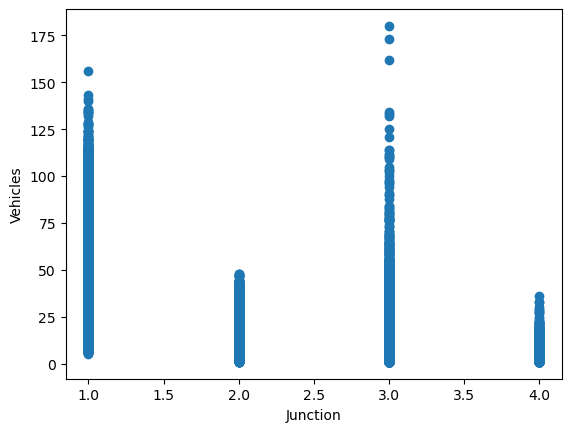

In [15]:
plt.scatter(df['Junction'],df['Vehicles'])
plt.xlabel('Junction')
plt.ylabel('Vehicles')
#graph shows that junction 3 goes to highest number of vehicles.
plt.show()

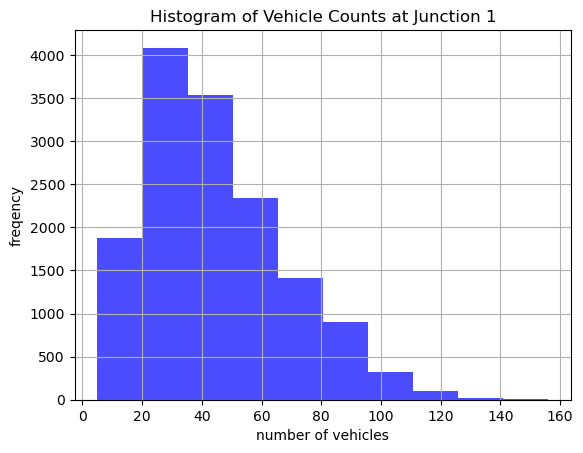

In [16]:
arr=[]
for index, row in df.iterrows():
    if row['Junction'] == 1: 
        arr.append(row['Vehicles'])
plt.hist(arr,bins=10, color='blue', alpha=0.7)
plt.xlabel('number of vehicles')
plt.ylabel('freqency')
plt.title('Histogram of Vehicle Counts at Junction 1')
plt.grid(True)
#at junction 1, the number of vehicles goes till 4000 and above.
plt.show()

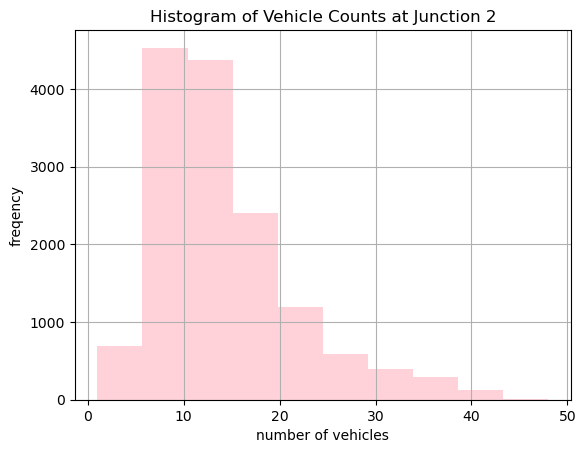

In [17]:
arr=[]
for index, row in df.iterrows():  
    if row['Junction'] == 2: 
        arr.append(row['Vehicles'])
plt.hist(arr,bins=10, color='pink', alpha=0.7)
plt.xlabel('number of vehicles')
plt.ylabel('freqency')
plt.title('Histogram of Vehicle Counts at Junction 2')
plt.grid(True)
#at junction 2, the number of vehicles goes till 4500+.
plt.show()

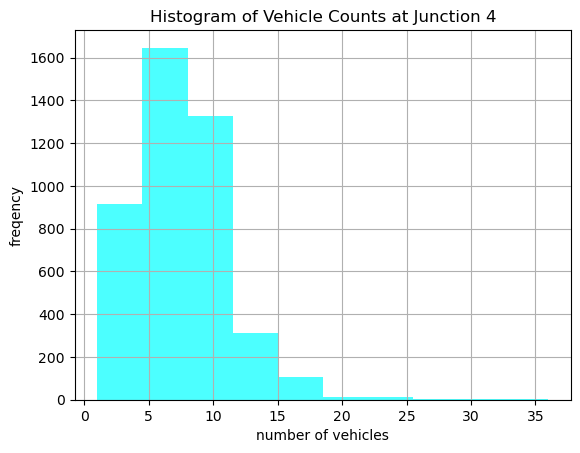

In [18]:
arr=[]
for index, row in df.iterrows():  
    if row['Junction'] == 4:  
        arr.append(row['Vehicles'])
plt.hist(arr,bins=10, color='cyan', alpha=0.7)
plt.xlabel('number of vehicles')
plt.ylabel('freqency')
plt.title('Histogram of Vehicle Counts at Junction 4')
plt.grid(True)
#at junction 4, the number of vehicles foes till 1600+.
plt.show()

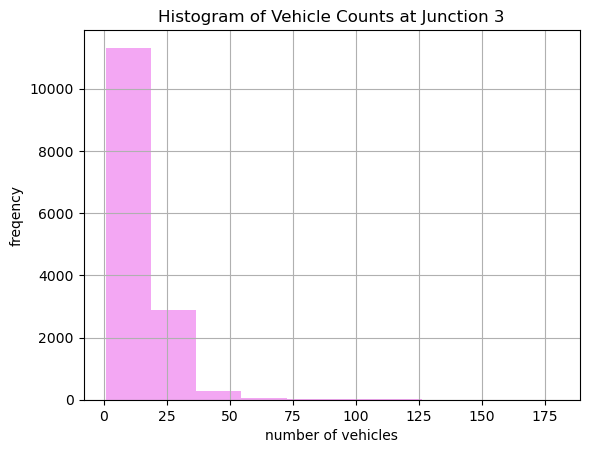

In [19]:
arr=[]
for index, row in df.iterrows(): 
    if row['Junction'] == 3:  
        arr.append(row['Vehicles'])
plt.hist(arr,bins=10, color='violet', alpha=0.7)
plt.xlabel('number of vehicles')
plt.ylabel('freqency')
plt.title('Histogram of Vehicle Counts at Junction 3')
plt.grid(True)
#at junction 3, the number of vehicles goes till 10000+.
plt.show()

Text(0.5, 0, 'DateTime')

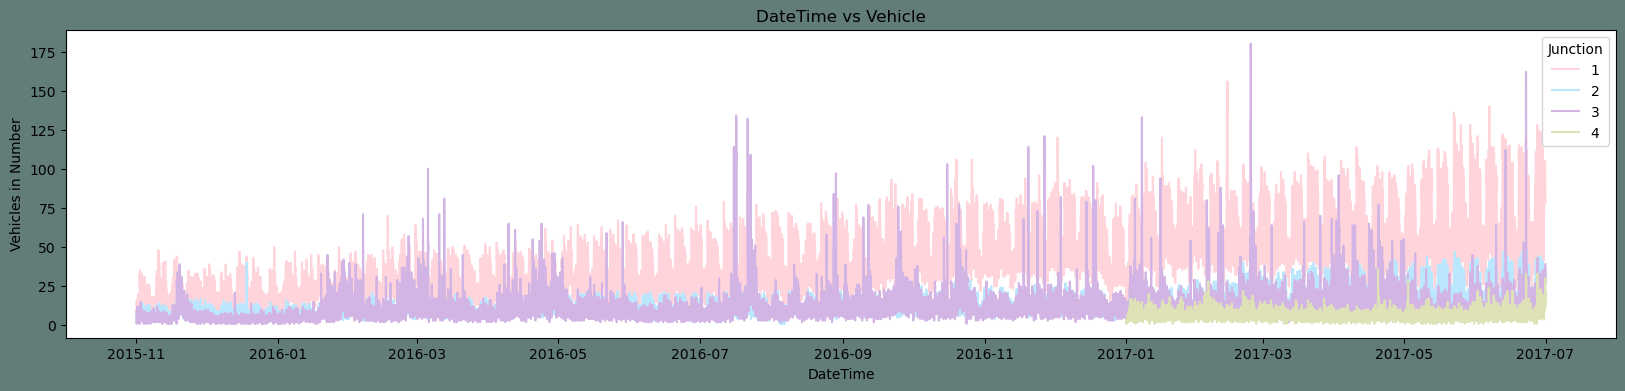

In [20]:
colors = ["#FFD4DB", "#BBE7FE", "#D3B5E5", "#dfe2b6"]
plt.figure(figsize=(20, 4), facecolor="#627D78")  
time_series = sns.lineplot(x=df['DateTime'], y="Vehicles", data=df, hue="Junction", palette=colors)  
time_series.set_title("DateTime vs Vehicle")  
time_series.set_ylabel("Vehicles in Number")  
time_series.set_xlabel("DateTime")

Text(0.5, 0, 'Date')

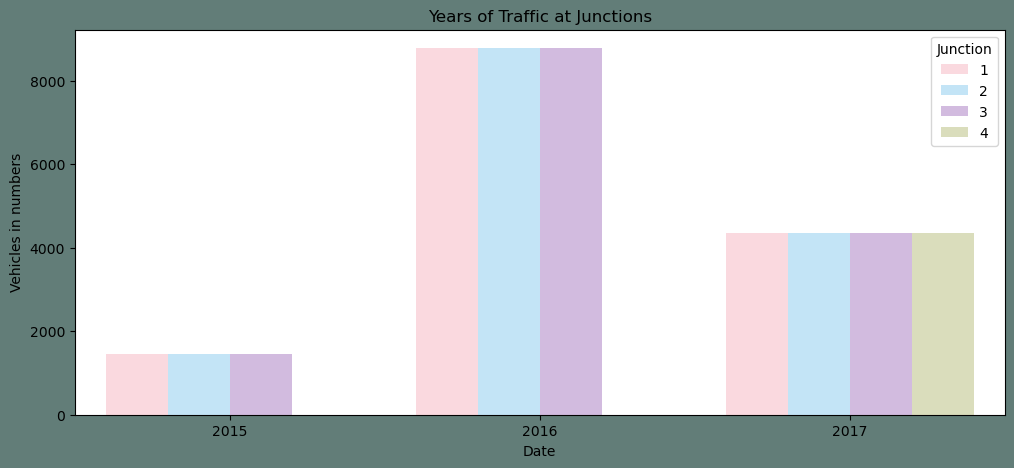

In [21]:
plt.figure(figsize=(12,5),facecolor="#627D78")  
colors = [ "#FFD4DB","#BBE7FE","#D3B5E5","#dfe2b6"]
count = sns.countplot(data=df, x =df["Year"], hue="Junction", palette=colors)  
count.set_title("Years of Traffic at Junctions")  
count.set_ylabel("Vehicles in numbers")  
count.set_xlabel("Date") 

In [22]:
df.head()

,DateTime,Junction,Vehicles,ID,Year,Month,Date_no,Hour,Day
0,2015-11-01 00:00:00,1,15,20151101001,2015,11,1,0,Sunday
1,2015-11-01 01:00:00,1,13,20151101011,2015,11,1,1,Sunday
2,2015-11-01 02:00:00,1,10,20151101021,2015,11,1,2,Sunday
3,2015-11-01 03:00:00,1,7,20151101031,2015,11,1,3,Sunday
4,2015-11-01 04:00:00,1,9,20151101041,2015,11,1,4,Sunday


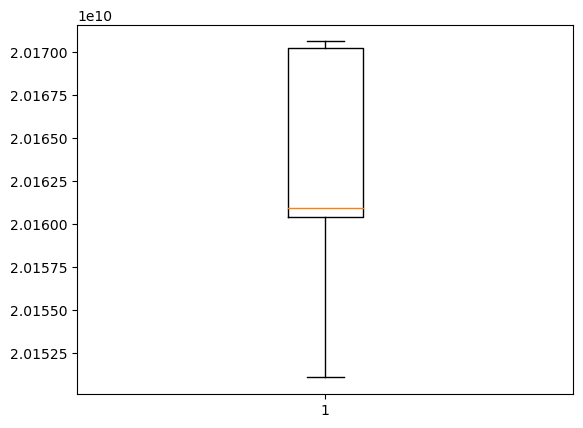

In [26]:
plt.boxplot(df.ID);

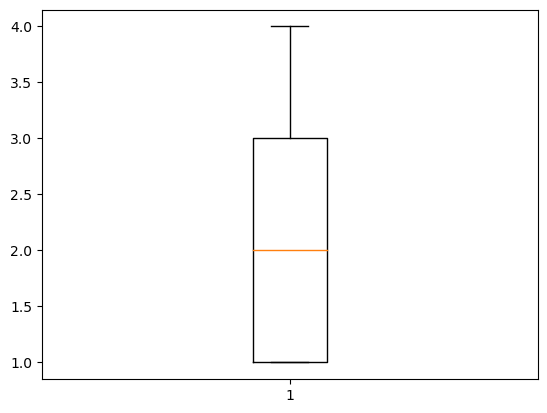

In [27]:
plt.boxplot(df.Junction);

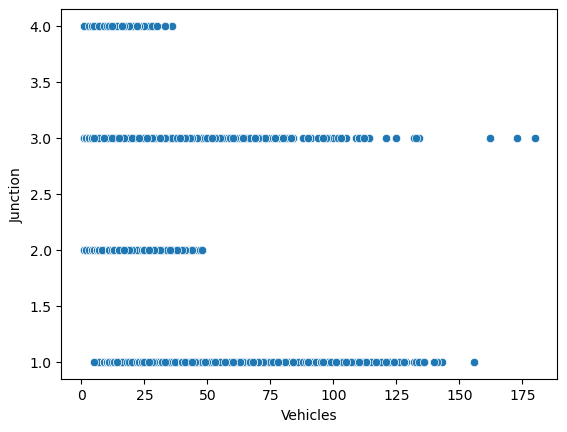

In [28]:
sns.scatterplot(data=df, x="Vehicles",y="Junction");

In [29]:
df.corr(numeric_only=True)

,Junction,Vehicles,ID,Year,Month,Date_no,Hour
Junction,1.000000e+00,-0.613787,0.221876,2.212977e-01,-1.242771e-01,-2.094621e-03,-2.132575e-15
Vehicles,-6.137872e-01,1.000000,0.227974,2.212531e-01,-2.272345e-02,2.789498e-02,2.199377e-01
ID,2.218756e-01,0.227974,1.000000,9.988958e-01,-5.860949e-01,-5.719135e-03,1.164412e-05
Year,2.212977e-01,0.221253,0.998896,1.000000e+00,-6.234957e-01,-7.474779e-03,7.732006e-16
Month,-1.242771e-01,-0.022723,-0.586095,-6.234957e-01,1.000000e+00,9.154760e-03,4.953278e-16
Date_no,-2.094621e-03,0.027895,-0.005719,-7.474779e-03,9.154760e-03,1.000000e+00,-9.917806e-18
Hour,-2.132575e-15,0.219938,0.000012,7.732006e-16,4.953278e-16,-9.917806e-18,1.000000e+00


<Axes: >

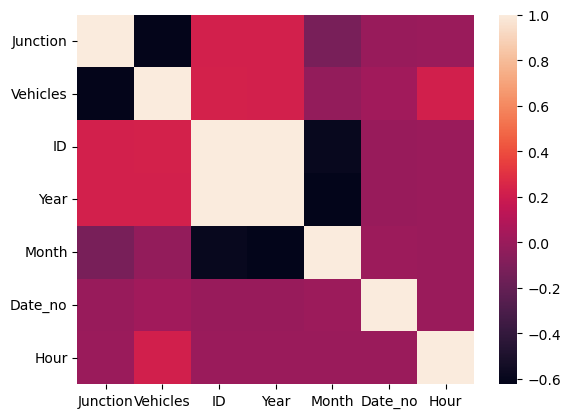

In [30]:
sns.heatmap(df.corr(numeric_only=True))

<Axes: >

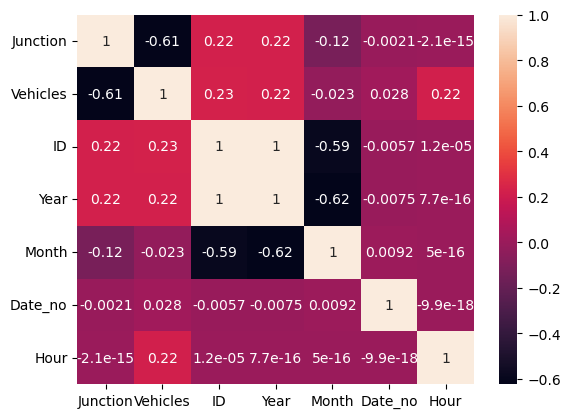

In [31]:
sns.heatmap(df.corr(numeric_only=True),annot=True)